In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Загрузка данных

In [2]:
company = pd.read_excel('./Компании.xlsx') #загружаю основной набор данных

In [3]:
company.head(3)

,Наименование,Дата регистрации,Код статистики,Отрасль,Форма собственности,Код причины постановки на учет,Органы власти и государственного управления,СПАРК код,Размер компании,"2018, Среднесписочная численность работников",...,"2019, Сальдо денежных потоков за отчетный период, RUB","2019, Поступление денежных средств всего, RUB","2019, Платежей всего, RUB","2019, Прибыль от приносящей доход деятельности, RUB","2019, Всего поступило средств, RUB","2019, Расходы на целевые мероприятия, RUB","2019, Расходы на содержание аппарата управления, RUB","2019, Приобретение основных средств, инвентаря и иного имущества, RUB","2019, Всего использовано средств, RUB","2019, Остаток средств на конец отчетного года, RUB"
0,"033, ООО",2003-10-14,71115178.0,Производство,Частная собственность,390601001.0,"Организации, учрежденные юридическими лицами и...",4283790,Микропредприятия,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"1 БЭЙК, ООО",2019-10-28,42006784.0,Производство,Частная собственность,391401001.0,"Организации, учрежденные юридическими лицами и...",12390280,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"1-Я ЛИФТОВАЯ, ООО",2014-11-11,35394691.0,Производство,Частная собственность,390601001.0,"Организации, учрежденные юридическими лицами и...",9603036,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
bank_guarantees = pd.read_excel('./Банковские гарантии.xlsx') #данные о наличии банковских гарантий

In [5]:
leasing = pd.read_excel('./Лизинг.xlsx') #данные о наличии действующих договоров лизинга

In [6]:
security_loan = pd.read_excel('./Залоги.xlsx') #данные о зарегестированных залогах(признак того что компания является залогодателем по кредиту)

In [7]:
security_loan.head()

,СПАРК код,Залоги
0,889841,1
1,9234875,1
2,9160679,1
3,2297344,1
4,4293759,1


## Подготовка данных

In [8]:
data = pd.merge(company, bank_guarantees, how='left') #объединяю исседуемые данные с данными о гарантиях

In [9]:
data = pd.merge(data, leasing, how='left') #объединяю исседуемые данные с данными  о лизинге

In [10]:
data = pd.merge(data, security_loan, how='left') #объединяю исседуемые данные с данными  о кредитвании

In [11]:
data.info() #сводные данные теперь храняться в "data"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12227 entries, 0 to 12226
Columns: 148 entries, Наименование to Залоги
dtypes: datetime64[ns](1), float64(140), int64(1), object(6)
memory usage: 13.9+ MB


In [12]:
pd.isnull(data).sum()
#после объединения данных получил большое количество пропусков в столбцах которые планирую использовать как данные для предсказания

Наименование                                              0
Дата регистрации                                         17
Код статистики                                           57
Отрасль                                                   0
Форма собственности                                      41
                                                      ...  
2019, Всего использовано средств, RUB                 11943
2019, Остаток средств на конец отчетного года, RUB    12003
БГ                                                    11891
Лизинг                                                11725
Залоги                                                11844
Length: 148, dtype: int64

In [13]:
data[['БГ', 'Лизинг', 'Залоги']] = data[['БГ', 'Лизинг', 'Залоги']].fillna(value=0) #обрабатываем пропуски в столбцах,которые будут испоьзоваться при формировании целевых столбцов

In [14]:
pd.isnull(data).sum()

Наименование                                              0
Дата регистрации                                         17
Код статистики                                           57
Отрасль                                                   0
Форма собственности                                      41
                                                      ...  
2019, Всего использовано средств, RUB                 11943
2019, Остаток средств на конец отчетного года, RUB    12003
БГ                                                        0
Лизинг                                                    0
Залоги                                                    0
Length: 148, dtype: int64

In [15]:
data.describe()

,Код статистики,Код причины постановки на учет,СПАРК код,"2018, Среднесписочная численность работников","2017, Доходы, RUB","2018, Доходы, RUB","2017, Расходы, RUB","2018, Расходы, RUB","2017, Налоги, RUB","2018, Налоги, RUB",...,"2019, Прибыль от приносящей доход деятельности, RUB","2019, Всего поступило средств, RUB","2019, Расходы на целевые мероприятия, RUB","2019, Расходы на содержание аппарата управления, RUB","2019, Приобретение основных средств, инвентаря и иного имущества, RUB","2019, Всего использовано средств, RUB","2019, Остаток средств на конец отчетного года, RUB",БГ,Лизинг,Залоги
count,1.217000e+04,1.214500e+04,1.222700e+04,7860.000000,6.529000e+03,6.723000e+03,6.529000e+03,6.723000e+03,6.556000e+03,6.916000e+03,...,4.800000e+01,2.800000e+02,1.470000e+02,2.060000e+02,5.100000e+01,2.840000e+02,2.240000e+02,12227.000000,12227.000000,12227.000000
mean,4.774692e+07,3.909655e+08,7.363669e+06,8.708397,3.696273e+07,6.765525e+07,3.527823e+07,6.378047e+07,1.362677e+06,5.102139e+06,...,1.027950e+07,1.414192e+07,8.093327e+06,4.002796e+06,6.244314e+05,1.374354e+07,2.559946e+06,0.027480,0.041057,0.031324
std,2.764807e+07,5.449271e+06,3.404972e+06,57.392902,2.542989e+08,7.662991e+08,2.496199e+08,7.547269e+08,8.100416e+06,1.360288e+08,...,5.182259e+07,5.971516e+07,3.111108e+07,2.250313e+07,1.190632e+06,5.908279e+07,4.291811e+07,0.163485,0.198429,0.174199
min,4.716000e+04,3.901010e+08,1.536000e+03,1.000000,0.000000e+00,-1.194900e+07,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,-2.091000e+06,-2.041000e+06,-6.000000e+03,-1.163000e+06,1.000000e+03,-4.382000e+06,-4.208010e+08,0.000000,0.000000,0.000000
25%,2.777519e+07,3.906010e+08,5.049960e+06,1.000000,7.540000e+05,7.355000e+05,7.900000e+05,7.990000e+05,5.039400e+04,4.995900e+04,...,4.375000e+04,2.520000e+05,1.070000e+05,1.407500e+05,4.150000e+04,2.125000e+05,1.000000e+04,0.000000,0.000000,0.000000
50%,4.236241e+07,3.906010e+08,7.886504e+06,1.000000,4.821000e+06,5.002000e+06,4.444000e+06,4.695000e+06,1.799070e+05,1.923335e+05,...,3.965000e+05,1.130500e+06,4.260000e+05,6.005000e+05,1.610000e+05,9.745000e+05,9.250000e+04,0.000000,0.000000,0.000000
75%,7.112371e+07,3.912010e+08,1.002957e+07,5.000000,2.046200e+07,2.242800e+07,1.891800e+07,2.078800e+07,6.349650e+05,7.323502e+05,...,2.061500e+06,4.454750e+06,2.038000e+06,2.050750e+06,5.385000e+05,4.080250e+06,6.530000e+05,0.000000,0.000000,0.000000
max,9.971510e+07,7.708010e+08,1.254730e+07,4079.000000,1.062454e+10,5.336259e+10,1.061781e+10,5.322594e+10,3.210900e+08,1.070500e+10,...,3.553420e+08,6.939350e+08,2.043270e+08,3.110270e+08,6.589000e+06,7.052140e+08,4.644630e+08,1.000000,1.000000,1.000000


## Подготовка данных для задачи по предсказанию фонда оплаты труда и количества сотрудников:

In [16]:
#Для удобства работы решил разбить данные на отдельные части для каждой задачи
zp = data[['СПАРК код',
           'Дата регистрации',
           'Код статистики',
           'Отрасль',
           'Форма собственности',
           'Налоговый режим',
           '2018, Доходы, RUB',
           '2018, Расходы, RUB',
           '2018, Налоги, RUB',
           '2018, Страховые взносы в ПФР, RUB',
           '2018, Страховые взносы в ФОМС, RUB',
           '2018, Страховые взносы в ФСС, RUB',
           '2018, Основные средства , RUB',
           '2018, Активы  всего, RUB',
           '2018, Собственный капитал, RUB',
           '2018, Выручка, RUB',
           '2018, Управленческие расходы, RUB',
           '2018, Прочие расходы, RUB',
           '2018, Чистая прибыль (убыток), RUB',
           '2018, Оплата труда, RUB',
           '2018, Среднесписочная численность работников'
          ]].copy()

In [17]:
zp.head(3)

,СПАРК код,Дата регистрации,Код статистики,Отрасль,Форма собственности,Налоговый режим,"2018, Доходы, RUB","2018, Расходы, RUB","2018, Налоги, RUB","2018, Страховые взносы в ПФР, RUB",...,"2018, Страховые взносы в ФСС, RUB","2018, Основные средства , RUB","2018, Активы всего, RUB","2018, Собственный капитал, RUB","2018, Выручка, RUB","2018, Управленческие расходы, RUB","2018, Прочие расходы, RUB","2018, Чистая прибыль (убыток), RUB","2018, Оплата труда, RUB","2018, Среднесписочная численность работников"
0,4283790,2003-10-14,71115178.0,Производство,Частная собственность,УСН,1211000.0,1167000.0,16597.0,NaN,...,NaN,620000.0,725000.0,600000.0,1211000.0,1167000.0,NaN,29000.0,NaN,1.0
1,12390280,2019-10-28,42006784.0,Производство,Частная собственность,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9603036,2014-11-11,35394691.0,Производство,Частная собственность,УСН,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [18]:
zp.corr()

,СПАРК код,Код статистики,"2018, Доходы, RUB","2018, Расходы, RUB","2018, Налоги, RUB","2018, Страховые взносы в ПФР, RUB","2018, Страховые взносы в ФОМС, RUB","2018, Страховые взносы в ФСС, RUB","2018, Основные средства , RUB","2018, Активы всего, RUB","2018, Собственный капитал, RUB","2018, Выручка, RUB","2018, Управленческие расходы, RUB","2018, Прочие расходы, RUB","2018, Чистая прибыль (убыток), RUB","2018, Оплата труда, RUB","2018, Среднесписочная численность работников"
СПАРК код,1.000000,-0.348862,-0.033766,-0.033171,-0.045300,-0.135598,-0.146072,-0.153620,-0.034150,-0.047587,-0.054577,-0.082909,-0.164997,-0.066478,-0.020416,-0.179677,-0.110341
Код статистики,-0.348862,1.000000,0.020186,0.019999,0.002071,0.019391,0.020295,0.023450,-0.000670,-0.006785,0.008410,0.007263,0.050998,0.005886,0.014199,0.054201,-0.003651
"2018, Доходы, RUB",-0.033766,0.020186,1.000000,0.998207,0.132937,0.262624,0.495233,0.497514,0.107468,0.308399,0.161242,0.455222,0.458116,0.556884,0.162387,0.530655,0.278954
"2018, Расходы, RUB",-0.033171,0.019999,0.998207,1.000000,0.120163,0.250488,0.488273,0.490230,0.092301,0.280960,0.117798,0.438051,0.450817,0.555372,0.110984,0.514623,0.267813
"2018, Налоги, RUB",-0.045300,0.002071,0.132937,0.120163,1.000000,0.243355,0.262399,0.239566,0.300891,0.461077,0.470311,0.292230,0.259933,0.156822,0.194743,0.250288,0.218483
"2018, Страховые взносы в ПФР, RUB",-0.135598,0.019391,0.262624,0.250488,0.243355,1.000000,0.987973,0.961847,0.482163,0.595978,0.326075,0.528830,0.683371,0.415563,0.243610,0.971225,0.886208
"2018, Страховые взносы в ФОМС, RUB",-0.146072,0.020295,0.495233,0.488273,0.262399,0.987973,1.000000,0.954387,0.491991,0.600243,0.340704,0.543015,0.725220,0.405024,0.242327,0.971570,0.875872
"2018, Страховые взносы в ФСС, RUB",-0.153620,0.023450,0.497514,0.490230,0.239566,0.961847,0.954387,1.000000,0.487594,0.599307,0.321417,0.558890,0.647190,0.378254,0.257411,0.941634,0.928211
"2018, Основные средства , RUB",-0.034150,-0.000670,0.107468,0.092301,0.300891,0.482163,0.491991,0.487594,1.000000,0.483781,0.445239,0.394461,0.377712,0.197525,0.250952,0.464212,0.520539
"2018, Активы всего, RUB",-0.047587,-0.006785,0.308399,0.280960,0.461077,0.595978,0.600243,0.599307,0.483781,1.000000,0.465288,0.632163,0.482207,0.200580,0.154547,0.570784,0.876652


In [19]:
zp.describe()

,СПАРК код,Код статистики,"2018, Доходы, RUB","2018, Расходы, RUB","2018, Налоги, RUB","2018, Страховые взносы в ПФР, RUB","2018, Страховые взносы в ФОМС, RUB","2018, Страховые взносы в ФСС, RUB","2018, Основные средства , RUB","2018, Активы всего, RUB","2018, Собственный капитал, RUB","2018, Выручка, RUB","2018, Управленческие расходы, RUB","2018, Прочие расходы, RUB","2018, Чистая прибыль (убыток), RUB","2018, Оплата труда, RUB","2018, Среднесписочная численность работников"
count,1.222700e+04,1.217000e+04,6.723000e+03,6.723000e+03,6.916000e+03,5.499000e+03,4.744000e+03,4.736000e+03,3.200000e+03,7.846000e+03,7.861000e+03,5.425000e+03,1.057000e+03,5.447000e+03,6.163000e+03,5.980000e+02,7860.000000
mean,7.363669e+06,4.774692e+07,6.765525e+07,6.378047e+07,5.102139e+06,7.388361e+05,1.751858e+05,9.021046e+04,2.299829e+07,5.023655e+07,1.279608e+07,6.001181e+07,1.056397e+07,7.865489e+06,2.957388e+06,2.301952e+07,8.708397
std,3.404972e+06,2.764807e+07,7.662991e+08,7.547269e+08,1.360288e+08,3.978190e+06,9.998552e+05,4.713477e+05,1.615269e+08,8.387364e+08,1.643961e+08,3.976602e+08,2.940112e+07,7.143855e+07,4.580852e+07,6.359598e+07,57.392902
min,1.536000e+03,4.716000e+04,-1.194900e+07,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03,1.000000e+03,-2.577266e+09,1.000000e+03,-1.182300e+07,-8.895000e+06,-1.494500e+09,-2.861600e+07,1.000000
25%,5.049960e+06,2.777519e+07,7.355000e+05,7.990000e+05,4.995900e+04,2.965100e+04,6.167000e+03,3.480000e+03,1.710000e+05,2.200000e+05,1.000000e+04,1.506000e+06,2.790000e+05,2.600000e+04,-8.500000e+04,3.860000e+05,1.000000
50%,7.886504e+06,4.236241e+07,5.002000e+06,4.695000e+06,1.923335e+05,8.936400e+04,1.744550e+04,9.973500e+03,1.086000e+06,2.501000e+06,3.160000e+05,6.569000e+06,1.579000e+06,1.210000e+05,1.010000e+05,2.495500e+06,1.000000
75%,1.002957e+07,7.112371e+07,2.242800e+07,2.078800e+07,7.323502e+05,2.944060e+05,5.636650e+04,3.213825e+04,5.895750e+06,1.492825e+07,4.209000e+06,2.688100e+07,8.066000e+06,9.990000e+05,1.091500e+06,1.461550e+07,5.000000
max,1.254730e+07,9.971510e+07,5.336259e+10,5.322594e+10,1.070500e+10,1.115868e+08,2.868460e+07,1.089792e+07,5.718265e+09,7.070885e+10,8.765452e+09,1.426563e+10,4.437720e+08,2.404268e+09,2.081940e+09,6.265480e+08,4079.000000


In [20]:
pd.isnull(zp).sum()

СПАРК код                                           0
Дата регистрации                                   17
Код статистики                                     57
Отрасль                                             0
Форма собственности                                41
Налоговый режим                                  4482
2018, Доходы, RUB                                5504
2018, Расходы, RUB                               5504
2018, Налоги, RUB                                5311
2018, Страховые взносы в ПФР, RUB                6728
2018, Страховые взносы в ФОМС, RUB               7483
2018, Страховые взносы в ФСС, RUB                7491
2018, Основные средства , RUB                    9027
2018, Активы  всего, RUB                         4381
2018, Собственный капитал, RUB                   4366
2018, Выручка, RUB                               6802
2018, Управленческие расходы, RUB               11170
2018, Прочие расходы, RUB                        6780
2018, Чистая прибыль (убыток

При анализе пропущенных значений видно что в исходных данным много пропусков в столбце "2018, Оплата труда, RUB" и что данных по среднесписочной численности сотрудников более чем в 10 раз больше.
Так как мы анализируем оплату труда только по одному региону(в нашей выборке включены толко компании Каллининградской области) то для уменьшения количества пропущенных данных попробуем заполнить пропуски в оплате труда по следующему алгоритму:
1. Из исходных данных рассчитаем среднюю опату труда на одного сотрудника (добавю отельый столец '2018, Средняя оплата труда сотрудника')
2. Заполним пропуки встобце '2018, Средняя оплата труда сотрудника' средними значниями по этому столбцу
3. Добавим столбец '2018, ФОТ' с рассчетными значениями произведения количества сотрудников и средней оплаты труда
4. Удалим столбец '2018, Средняя оплата труда сотрудника'
5. Сравним данные из '2018, ФОТ' с данными в столбце "2018, Оплата труда, RUB" и в случае большой доли совпадения данных, будем использовать его в качестве целевого значения
6. Удалим столбец '2018, Средняя оплата труда сотрудника'

In [21]:
#рассчитываем среднюю оплату труда сотрудника за год
zp['2018, Средняя оплата труда сотрудника'] =  zp['2018, Оплата труда, RUB'] / zp['2018, Среднесписочная численность работников'].astype(float) 

In [22]:
#заполняем пропуски среними значениями по столбцу
zp['2018, Средняя оплата труда сотрудника'] = zp['2018, Средняя оплата труда сотрудника'].fillna(zp['2018, Средняя оплата труда сотрудника'].mean())

In [23]:
#добавляем столбец с рассчетным фондом оплаты труда
zp['2018, ФОТ'] = zp['2018, Средняя оплата труда сотрудника'] * zp['2018, Среднесписочная численность работников'].astype(float)

In [24]:
# анализируем количество имеющихся данных в столбце '2018, Оплата труда, RUB'
zp['2018, Оплата труда, RUB'].count()

598

In [25]:
# создаем временный столбец для проверки расчетного ФОТ(сверяем рассчетный ФОТ с факическим)
zp['test'] = zp['2018, ФОТ'] == zp['2018, Оплата труда, RUB']

In [26]:
#анализируем данные проверки
zp['test'].value_counts()

False    11721
True       506
Name: test, dtype: int64

In [27]:
#рассчитываю точность расчета
print('рассчитанные данные соответствуют фактическим на', 506/598*100,'%')

рассчитанные данные соответствуют фактическим на 84.61538461538461 %


In [28]:
#to do: Подумать как в качестве заполнтелей пропусков в столбце '2018, Оплата труда, RUB' исползовать данные из '2018, ФОТ'

За целевую переменную будем брать рассчитанные значения ФОТ

In [29]:
#удаляем временные созданные столбцы и столбец с фактическими данными по оплате труда(он будет заменен столбцом с рассчетными значениями)
del zp['2018, Средняя оплата труда сотрудника']
del zp['2018, Оплата труда, RUB']
del zp['test']

In [30]:
#отсутствие значений в столбце с расходами будем интерпритировать как нулевые расходы
zp['2018, Управленческие расходы, RUB'] = zp['2018, Управленческие расходы, RUB'].fillna(0)

In [31]:
#проанализируем пропуски после преобразований
pd.isnull(zp).sum()

СПАРК код                                          0
Дата регистрации                                  17
Код статистики                                    57
Отрасль                                            0
Форма собственности                               41
Налоговый режим                                 4482
2018, Доходы, RUB                               5504
2018, Расходы, RUB                              5504
2018, Налоги, RUB                               5311
2018, Страховые взносы в ПФР, RUB               6728
2018, Страховые взносы в ФОМС, RUB              7483
2018, Страховые взносы в ФСС, RUB               7491
2018, Основные средства , RUB                   9027
2018, Активы  всего, RUB                        4381
2018, Собственный капитал, RUB                  4366
2018, Выручка, RUB                              6802
2018, Управленческие расходы, RUB                  0
2018, Прочие расходы, RUB                       6780
2018, Чистая прибыль (убыток), RUB            

In [32]:
zp = zp.dropna() #удаляем пропущенные значения

## Подготовка данных для задачи по классификации клиентов на кредитующихся и не кредитующихся

In [33]:
cred = data[['СПАРК код',
             'Дата регистрации',
             'Код статистики',
             'Отрасль',
             'Форма собственности',
             'Налоговый режим',
           'Код причины постановки на учет',
             '2019, Основные средства , RUB',
             '2019, Долгосрочные финансовые вложения, RUB',
           '2019, Отложенные налоговые активы, RUB',
           '2019, Внеоборотные активы, RUB',
           '2019, Чистые активы, RUB',
           '2019, Запасы, RUB',
           '2019, НДС по приобретенным ценностям , RUB',
           '2019, Дебиторская задолженность, RUB',
           '2019, Краткосрочные финансовые вложения, RUB',
           '2019, Денежные средства и денежные эквиваленты, RUB',
           '2019, Прочие оборотные активы, RUB',
           '2019, Оборотные активы, RUB',
           '2019, Активы  всего, RUB',
           '2019, Уставный капитал , RUB',
           '2019, Добавочный капитал, RUB',
           '2019, Нераспределенная прибыль (непокрытый убыток), RUB',
           '2019, Капитал и резервы, RUB',
           '2019, Собственный оборотный капитал, RUB',
           '2019, Себестоимость продаж, RUB',
           '2019, Валовая прибыль (убыток), RUB',
           '2019, Проценты к получению, RUB',
           '2019, Прочие доходы, RUB',
           '2019, Прибыль (убыток) до налогообложения , RUB',
           '2019, Текущий налог на прибыль, RUB',
           '2019, EBIT, RUB',
           '2019, Поступления от текущих операций, RUB',
           '2019, Поступления от продаж, RUB',
           '2019, Платежи по текущим операциям, RUB',
           '2019, Платежи поставщикам и подрядчикам, RUB',
           '2019, Оплата процентов по долговым обязательствам, RUB',
           '2019, Налог на прибыль, RUB',
           '2019, Сальдо денежных потоков от текущих операций, RUB',
           '2019, Платежи по инвестиционным операциям, RUB',
           '2019, Сальдо денежных потоков от инвестиционных операций, RUB',
           '2019, Поступления от финансовых операций, RUB',
           '2019, Платежи по финансовым операциям, RUB',
           '2019, Сальдо денежных потоков от финансовых операций, RUB',
           '2019, Сальдо денежных потоков за отчетный период, RUB',
           '2019, Поступление денежных средств всего, RUB',
             '2019, Заёмные средства (долгосрочные), RUB',
             '2019, Прочие долгосрочные обязательства, RUB',
             '2019, Долгосрочные обязательства, RUB',
             '2019, Заёмные средства (краткосрочные), RUB',
             '2019, Кредиторская задолженность, RUB',
             '2019, Прочие краткосрочные обязательства, RUB',
             '2019, Краткосрочные обязательства, RUB',
             '2019, Пассивы всего, RUB',
             '2019, Совокупный долг, RUB',
             '2019, Собственный капитал, RUB',
             '2019, Выручка, RUB',
             '2019, Коммерческие расходы, RUB',
             '2019, Управленческие расходы, RUB',
             '2019, Прибыль (убыток) от продажи, RUB',
             '2019, Проценты к уплате, RUB',
             '2019, Прочие расходы, RUB',
             '2019, Чистая прибыль (убыток), RUB',
             '2019, Получение кредитов и займов, RUB',
             '2019, Погашение векселей, возврат кредитов и займов, RUB',
             'Залоги'
          ]].copy()

In [34]:
cred.head(2)

,СПАРК код,Дата регистрации,Код статистики,Отрасль,Форма собственности,Налоговый режим,Код причины постановки на учет,"2019, Основные средства , RUB","2019, Долгосрочные финансовые вложения, RUB","2019, Отложенные налоговые активы, RUB",...,"2019, Выручка, RUB","2019, Коммерческие расходы, RUB","2019, Управленческие расходы, RUB","2019, Прибыль (убыток) от продажи, RUB","2019, Проценты к уплате, RUB","2019, Прочие расходы, RUB","2019, Чистая прибыль (убыток), RUB","2019, Получение кредитов и займов, RUB","2019, Погашение векселей, возврат кредитов и займов, RUB",Залоги
0,4283790,2003-10-14,71115178.0,Производство,Частная собственность,УСН,390601001.0,651000.0,NaN,NaN,...,909000.0,NaN,47000.0,-320000.0,NaN,47000.0,-365000.0,NaN,NaN,0.0
1,12390280,2019-10-28,42006784.0,Производство,Частная собственность,NaN,391401001.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [35]:
pd.isnull(cred).sum().nlargest(50)

2019, Оплата процентов по долговым обязательствам, RUB           12064
2019, Платежи по инвестиционным операциям, RUB                   11970
2019, Прочие краткосрочные обязательства, RUB                    11956
2019, Отложенные налоговые активы, RUB                           11955
2019, Прочие долгосрочные обязательства, RUB                     11938
2019, Сальдо денежных потоков от инвестиционных операций, RUB    11932
2019, Погашение векселей, возврат кредитов и займов, RUB         11925
2019, Проценты к получению, RUB                                  11917
2019, Добавочный капитал, RUB                                    11890
2019, Налог на прибыль, RUB                                      11889
2019, Получение кредитов и займов, RUB                           11868
2019, Платежи по финансовым операциям, RUB                       11858
2019, НДС по приобретенным ценностям , RUB                       11830
2019, Поступления от финансовых операций, RUB                    11829
2019, 

In [36]:
# обработка пропусков
# так как большая часть данных это финансовые показатели, то предположим что пропущенное значение эквивалентно нулю
cred[[
             '2019, Заёмные средства (долгосрочные), RUB',
             '2019, Прочие долгосрочные обязательства, RUB',
             '2019, Долгосрочные обязательства, RUB',
             '2019, Заёмные средства (краткосрочные), RUB',
             '2019, Кредиторская задолженность, RUB',
             '2019, Прочие краткосрочные обязательства, RUB',
             '2019, Краткосрочные обязательства, RUB',
             '2019, Совокупный долг, RUB',
             '2019, Коммерческие расходы, RUB',
             '2019, Управленческие расходы, RUB',
             '2019, Прибыль (убыток) от продажи, RUB',
             '2019, Проценты к уплате, RUB',
             '2019, Прочие расходы, RUB',
             '2019, Получение кредитов и займов, RUB',
             '2019, Погашение векселей, возврат кредитов и займов, RUB',
            '2019, Основные средства , RUB',
            '2019, Долгосрочные финансовые вложения, RUB',
           '2019, Долгосрочные финансовые вложения, RUB',
           '2019, Отложенные налоговые активы, RUB',
           '2019, Внеоборотные активы, RUB',
           '2019, Чистые активы, RUB',
           '2019, Запасы, RUB',
           '2019, НДС по приобретенным ценностям , RUB',
           '2019, Дебиторская задолженность, RUB',
           '2019, Краткосрочные финансовые вложения, RUB',
           '2019, Денежные средства и денежные эквиваленты, RUB',
           '2019, Прочие оборотные активы, RUB',
           '2019, Оборотные активы, RUB',
           '2019, Активы  всего, RUB',
           '2019, Уставный капитал , RUB',
           '2019, Добавочный капитал, RUB',
           '2019, Нераспределенная прибыль (непокрытый убыток), RUB',
           '2019, Капитал и резервы, RUB',
           '2019, Собственный оборотный капитал, RUB',
           '2019, Себестоимость продаж, RUB',
           '2019, Валовая прибыль (убыток), RUB',
           '2019, Проценты к получению, RUB',
           '2019, Прочие доходы, RUB',
           '2019, Прибыль (убыток) до налогообложения , RUB',
           '2019, Текущий налог на прибыль, RUB',
           '2019, EBIT, RUB',
           '2019, Поступления от текущих операций, RUB',
           '2019, Поступления от продаж, RUB',
           '2019, Платежи по текущим операциям, RUB',
           '2019, Платежи поставщикам и подрядчикам, RUB',
           '2019, Оплата процентов по долговым обязательствам, RUB',
           '2019, Налог на прибыль, RUB',
           '2019, Сальдо денежных потоков от текущих операций, RUB',
           '2019, Платежи по инвестиционным операциям, RUB',
           '2019, Сальдо денежных потоков от инвестиционных операций, RUB',
           '2019, Поступления от финансовых операций, RUB',
           '2019, Платежи по финансовым операциям, RUB',
           '2019, Сальдо денежных потоков от финансовых операций, RUB',
           '2019, Сальдо денежных потоков за отчетный период, RUB',
           '2019, Поступление денежных средств всего, RUB'
    
]] = cred[[
             '2019, Заёмные средства (долгосрочные), RUB',
             '2019, Прочие долгосрочные обязательства, RUB',
             '2019, Долгосрочные обязательства, RUB',
             '2019, Заёмные средства (краткосрочные), RUB',
             '2019, Кредиторская задолженность, RUB',
             '2019, Прочие краткосрочные обязательства, RUB',
             '2019, Краткосрочные обязательства, RUB',
             '2019, Совокупный долг, RUB',
             '2019, Коммерческие расходы, RUB',
             '2019, Управленческие расходы, RUB',
             '2019, Прибыль (убыток) от продажи, RUB',
             '2019, Проценты к уплате, RUB',
             '2019, Прочие расходы, RUB',
             '2019, Получение кредитов и займов, RUB',
             '2019, Погашение векселей, возврат кредитов и займов, RUB',
            '2019, Основные средства , RUB',
            '2019, Долгосрочные финансовые вложения, RUB',
           '2019, Долгосрочные финансовые вложения, RUB',
           '2019, Отложенные налоговые активы, RUB',
           '2019, Внеоборотные активы, RUB',
           '2019, Чистые активы, RUB',
           '2019, Запасы, RUB',
           '2019, НДС по приобретенным ценностям , RUB',
           '2019, Дебиторская задолженность, RUB',
           '2019, Краткосрочные финансовые вложения, RUB',
           '2019, Денежные средства и денежные эквиваленты, RUB',
           '2019, Прочие оборотные активы, RUB',
           '2019, Оборотные активы, RUB',
           '2019, Активы  всего, RUB',
           '2019, Уставный капитал , RUB',
           '2019, Добавочный капитал, RUB',
           '2019, Нераспределенная прибыль (непокрытый убыток), RUB',
           '2019, Капитал и резервы, RUB',
           '2019, Собственный оборотный капитал, RUB',
           '2019, Себестоимость продаж, RUB',
           '2019, Валовая прибыль (убыток), RUB',
           '2019, Проценты к получению, RUB',
           '2019, Прочие доходы, RUB',
           '2019, Прибыль (убыток) до налогообложения , RUB',
           '2019, Текущий налог на прибыль, RUB',
           '2019, EBIT, RUB',
           '2019, Поступления от текущих операций, RUB',
           '2019, Поступления от продаж, RUB',
           '2019, Платежи по текущим операциям, RUB',
           '2019, Платежи поставщикам и подрядчикам, RUB',
           '2019, Оплата процентов по долговым обязательствам, RUB',
           '2019, Налог на прибыль, RUB',
           '2019, Сальдо денежных потоков от текущих операций, RUB',
           '2019, Платежи по инвестиционным операциям, RUB',
           '2019, Сальдо денежных потоков от инвестиционных операций, RUB',
           '2019, Поступления от финансовых операций, RUB',
           '2019, Платежи по финансовым операциям, RUB',
           '2019, Сальдо денежных потоков от финансовых операций, RUB',
           '2019, Сальдо денежных потоков за отчетный период, RUB',
           '2019, Поступление денежных средств всего, RUB'
    
]].fillna(0)

In [37]:
pd.isnull(cred).sum() #анализируем количество пропусков после частичного заполнения данных нулевыми значениями

СПАРК код                                                      0
Дата регистрации                                              17
Код статистики                                                57
Отрасль                                                        0
Форма собственности                                           41
                                                            ... 
2019, Прочие расходы, RUB                                      0
2019, Чистая прибыль (убыток), RUB                          6196
2019, Получение кредитов и займов, RUB                         0
2019, Погашение векселей, возврат кредитов и займов, RUB       0
Залоги                                                         0
Length: 66, dtype: int64

In [38]:
cred = cred.dropna() #удаляем пропущенные значения

In [39]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 12217
Data columns (total 66 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   СПАРК код                                                      3774 non-null   int64         
 1   Дата регистрации                                               3774 non-null   datetime64[ns]
 2   Код статистики                                                 3774 non-null   float64       
 3   Отрасль                                                        3774 non-null   object        
 4   Форма собственности                                            3774 non-null   object        
 5   Налоговый режим                                                3774 non-null   object        
 6   Код причины постановки на учет                                 3774 non-null   float64       
 

In [40]:
cred.corr()

,СПАРК код,Код статистики,Код причины постановки на учет,"2019, Основные средства , RUB","2019, Долгосрочные финансовые вложения, RUB","2019, Отложенные налоговые активы, RUB","2019, Внеоборотные активы, RUB","2019, Чистые активы, RUB","2019, Запасы, RUB","2019, НДС по приобретенным ценностям , RUB",...,"2019, Выручка, RUB","2019, Коммерческие расходы, RUB","2019, Управленческие расходы, RUB","2019, Прибыль (убыток) от продажи, RUB","2019, Проценты к уплате, RUB","2019, Прочие расходы, RUB","2019, Чистая прибыль (убыток), RUB","2019, Получение кредитов и займов, RUB","2019, Погашение векселей, возврат кредитов и займов, RUB",Залоги
СПАРК код,1.000000,-0.399750,0.002363,-0.063227,-0.009766,0.023867,-0.022050,-0.087155,-0.070176,-0.018008,...,0.002102,-0.039341,-0.047196,0.000738,-0.039040,-0.002476,-0.000452,0.000796,0.007239,-0.099197
Код статистики,-0.399750,1.000000,-0.019545,0.032946,0.020267,-0.003212,0.015473,0.030378,0.022029,0.018220,...,0.001745,0.008707,0.016059,0.003043,0.033618,0.008844,0.005996,0.008077,0.003224,0.068211
Код причины постановки на учет,0.002363,-0.019545,1.000000,0.009840,0.016911,-0.011327,0.010378,-0.011001,0.002328,-0.021628,...,0.035330,-0.023253,0.024817,0.031364,-0.025058,0.034230,0.029260,-0.011391,-0.017948,-0.006027
"2019, Основные средства , RUB",-0.063227,0.032946,0.009840,1.000000,0.045771,-0.004375,0.710150,0.409259,0.131290,0.095988,...,0.012960,0.053941,0.168706,0.016476,0.252900,0.010947,0.017812,0.200966,0.148168,0.091228
"2019, Долгосрочные финансовые вложения, RUB",-0.009766,0.020267,0.016911,0.045771,1.000000,-0.001587,0.365460,0.097176,0.033685,-0.002275,...,0.005089,0.047480,0.035887,0.013245,0.089861,0.016757,0.014741,0.084299,0.066012,-0.003647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"2019, Прочие расходы, RUB",-0.002476,0.008844,0.034230,0.010947,0.016757,0.003215,0.010373,0.007668,0.010308,0.003918,...,0.984060,0.009467,0.007986,0.990443,0.010938,1.000000,0.986053,0.004693,0.005443,0.001374
"2019, Чистая прибыль (убыток), RUB",-0.000452,0.005996,0.029260,0.017812,0.014741,-0.007032,0.016227,0.068274,0.013121,0.001988,...,0.964884,0.001162,0.005240,0.992732,0.007154,0.986053,1.000000,0.003548,0.003832,0.000115
"2019, Получение кредитов и займов, RUB",0.000796,0.008077,-0.011391,0.200966,0.084299,0.026314,0.202314,0.048442,0.209856,0.203943,...,0.024294,0.189932,0.140348,0.003874,0.490697,0.004693,0.003548,1.000000,0.950820,0.127575
"2019, Погашение векселей, возврат кредитов и займов, RUB",0.007239,0.003224,-0.017948,0.148168,0.066012,0.023146,0.148389,0.045107,0.200832,0.247407,...,0.025969,0.218307,0.148337,0.003565,0.471778,0.005443,0.003832,0.950820,1.000000,0.130575


## Подготовка данных для задачи по классификации на компании используюзие банковские гарантии

In [41]:
#Для удобства работы решил разбить данные на отдельные части для каждой задачи
bg = data[['СПАРК код',
             'Дата регистрации',
             'Код статистики',
             'Отрасль',
             'Форма собственности',
             'Налоговый режим',
           'Код причины постановки на учет',
             '2019, Основные средства , RUB',
             '2019, Долгосрочные финансовые вложения, RUB',
           '2019, Отложенные налоговые активы, RUB',
           '2019, Внеоборотные активы, RUB',
           '2019, Чистые активы, RUB',
           '2019, Запасы, RUB',
           '2019, НДС по приобретенным ценностям , RUB',
           '2019, Дебиторская задолженность, RUB',
           '2019, Краткосрочные финансовые вложения, RUB',
           '2019, Денежные средства и денежные эквиваленты, RUB',
           '2019, Прочие оборотные активы, RUB',
           '2019, Оборотные активы, RUB',
           '2019, Активы  всего, RUB',
           '2019, Уставный капитал , RUB',
           '2019, Добавочный капитал, RUB',
           '2019, Нераспределенная прибыль (непокрытый убыток), RUB',
           '2019, Капитал и резервы, RUB',
           '2019, Собственный оборотный капитал, RUB',
           '2019, Себестоимость продаж, RUB',
           '2019, Валовая прибыль (убыток), RUB',
           '2019, Проценты к получению, RUB',
           '2019, Прочие доходы, RUB',
           '2019, Прибыль (убыток) до налогообложения , RUB',
           '2019, Текущий налог на прибыль, RUB',
           '2019, EBIT, RUB',
           '2019, Поступления от текущих операций, RUB',
           '2019, Поступления от продаж, RUB',
           '2019, Платежи по текущим операциям, RUB',
           '2019, Платежи поставщикам и подрядчикам, RUB',
           '2019, Оплата процентов по долговым обязательствам, RUB',
           '2019, Налог на прибыль, RUB',
           '2019, Сальдо денежных потоков от текущих операций, RUB',
           '2019, Платежи по инвестиционным операциям, RUB',
           '2019, Сальдо денежных потоков от инвестиционных операций, RUB',
           '2019, Поступления от финансовых операций, RUB',
           '2019, Платежи по финансовым операциям, RUB',
           '2019, Сальдо денежных потоков от финансовых операций, RUB',
           '2019, Сальдо денежных потоков за отчетный период, RUB',
           '2019, Поступление денежных средств всего, RUB',
             '2019, Заёмные средства (долгосрочные), RUB',
             '2019, Прочие долгосрочные обязательства, RUB',
             '2019, Долгосрочные обязательства, RUB',
             '2019, Заёмные средства (краткосрочные), RUB',
             '2019, Кредиторская задолженность, RUB',
             '2019, Прочие краткосрочные обязательства, RUB',
             '2019, Краткосрочные обязательства, RUB',
             '2019, Пассивы всего, RUB',
             '2019, Совокупный долг, RUB',
             '2019, Собственный капитал, RUB',
             '2019, Выручка, RUB',
             '2019, Коммерческие расходы, RUB',
             '2019, Управленческие расходы, RUB',
             '2019, Прибыль (убыток) от продажи, RUB',
             '2019, Проценты к уплате, RUB',
             '2019, Прочие расходы, RUB',
             '2019, Чистая прибыль (убыток), RUB',
             '2019, Получение кредитов и займов, RUB',
             '2019, Погашение векселей, возврат кредитов и займов, RUB',
             'БГ'
          ]].copy()

In [42]:
bg.head(3)

,СПАРК код,Дата регистрации,Код статистики,Отрасль,Форма собственности,Налоговый режим,Код причины постановки на учет,"2019, Основные средства , RUB","2019, Долгосрочные финансовые вложения, RUB","2019, Отложенные налоговые активы, RUB",...,"2019, Выручка, RUB","2019, Коммерческие расходы, RUB","2019, Управленческие расходы, RUB","2019, Прибыль (убыток) от продажи, RUB","2019, Проценты к уплате, RUB","2019, Прочие расходы, RUB","2019, Чистая прибыль (убыток), RUB","2019, Получение кредитов и займов, RUB","2019, Погашение векселей, возврат кредитов и займов, RUB",БГ
0,4283790,2003-10-14,71115178.0,Производство,Частная собственность,УСН,390601001.0,651000.0,NaN,NaN,...,909000.0,NaN,47000.0,-320000.0,NaN,47000.0,-365000.0,NaN,NaN,0.0
1,12390280,2019-10-28,42006784.0,Производство,Частная собственность,NaN,391401001.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,9603036,2014-11-11,35394691.0,Производство,Частная собственность,УСН,390601001.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [43]:
# обработка пропусков
# так как большая часть данных это финансовые показатели, то предположим что пропущенное значение эквивалентно нулю
bg[[
             '2019, Заёмные средства (долгосрочные), RUB',
             '2019, Прочие долгосрочные обязательства, RUB',
             '2019, Долгосрочные обязательства, RUB',
             '2019, Заёмные средства (краткосрочные), RUB',
             '2019, Кредиторская задолженность, RUB',
             '2019, Прочие краткосрочные обязательства, RUB',
             '2019, Краткосрочные обязательства, RUB',
             '2019, Совокупный долг, RUB',
             '2019, Коммерческие расходы, RUB',
             '2019, Управленческие расходы, RUB',
             '2019, Прибыль (убыток) от продажи, RUB',
             '2019, Проценты к уплате, RUB',
             '2019, Прочие расходы, RUB',
             '2019, Получение кредитов и займов, RUB',
             '2019, Погашение векселей, возврат кредитов и займов, RUB',
            '2019, Основные средства , RUB',
            '2019, Долгосрочные финансовые вложения, RUB',
           '2019, Долгосрочные финансовые вложения, RUB',
           '2019, Отложенные налоговые активы, RUB',
           '2019, Внеоборотные активы, RUB',
           '2019, Чистые активы, RUB',
           '2019, Запасы, RUB',
           '2019, НДС по приобретенным ценностям , RUB',
           '2019, Дебиторская задолженность, RUB',
           '2019, Краткосрочные финансовые вложения, RUB',
           '2019, Денежные средства и денежные эквиваленты, RUB',
           '2019, Прочие оборотные активы, RUB',
           '2019, Оборотные активы, RUB',
           '2019, Активы  всего, RUB',
           '2019, Уставный капитал , RUB',
           '2019, Добавочный капитал, RUB',
           '2019, Нераспределенная прибыль (непокрытый убыток), RUB',
           '2019, Капитал и резервы, RUB',
           '2019, Собственный оборотный капитал, RUB',
           '2019, Себестоимость продаж, RUB',
           '2019, Валовая прибыль (убыток), RUB',
           '2019, Проценты к получению, RUB',
           '2019, Прочие доходы, RUB',
           '2019, Прибыль (убыток) до налогообложения , RUB',
           '2019, Текущий налог на прибыль, RUB',
           '2019, EBIT, RUB',
           '2019, Поступления от текущих операций, RUB',
           '2019, Поступления от продаж, RUB',
           '2019, Платежи по текущим операциям, RUB',
           '2019, Платежи поставщикам и подрядчикам, RUB',
           '2019, Оплата процентов по долговым обязательствам, RUB',
           '2019, Налог на прибыль, RUB',
           '2019, Сальдо денежных потоков от текущих операций, RUB',
           '2019, Платежи по инвестиционным операциям, RUB',
           '2019, Сальдо денежных потоков от инвестиционных операций, RUB',
           '2019, Поступления от финансовых операций, RUB',
           '2019, Платежи по финансовым операциям, RUB',
           '2019, Сальдо денежных потоков от финансовых операций, RUB',
           '2019, Сальдо денежных потоков за отчетный период, RUB',
           '2019, Поступление денежных средств всего, RUB'
    
]] = bg[[
             '2019, Заёмные средства (долгосрочные), RUB',
             '2019, Прочие долгосрочные обязательства, RUB',
             '2019, Долгосрочные обязательства, RUB',
             '2019, Заёмные средства (краткосрочные), RUB',
             '2019, Кредиторская задолженность, RUB',
             '2019, Прочие краткосрочные обязательства, RUB',
             '2019, Краткосрочные обязательства, RUB',
             '2019, Совокупный долг, RUB',
             '2019, Коммерческие расходы, RUB',
             '2019, Управленческие расходы, RUB',
             '2019, Прибыль (убыток) от продажи, RUB',
             '2019, Проценты к уплате, RUB',
             '2019, Прочие расходы, RUB',
             '2019, Получение кредитов и займов, RUB',
             '2019, Погашение векселей, возврат кредитов и займов, RUB',
            '2019, Основные средства , RUB',
            '2019, Долгосрочные финансовые вложения, RUB',
           '2019, Долгосрочные финансовые вложения, RUB',
           '2019, Отложенные налоговые активы, RUB',
           '2019, Внеоборотные активы, RUB',
           '2019, Чистые активы, RUB',
           '2019, Запасы, RUB',
           '2019, НДС по приобретенным ценностям , RUB',
           '2019, Дебиторская задолженность, RUB',
           '2019, Краткосрочные финансовые вложения, RUB',
           '2019, Денежные средства и денежные эквиваленты, RUB',
           '2019, Прочие оборотные активы, RUB',
           '2019, Оборотные активы, RUB',
           '2019, Активы  всего, RUB',
           '2019, Уставный капитал , RUB',
           '2019, Добавочный капитал, RUB',
           '2019, Нераспределенная прибыль (непокрытый убыток), RUB',
           '2019, Капитал и резервы, RUB',
           '2019, Собственный оборотный капитал, RUB',
           '2019, Себестоимость продаж, RUB',
           '2019, Валовая прибыль (убыток), RUB',
           '2019, Проценты к получению, RUB',
           '2019, Прочие доходы, RUB',
           '2019, Прибыль (убыток) до налогообложения , RUB',
           '2019, Текущий налог на прибыль, RUB',
           '2019, EBIT, RUB',
           '2019, Поступления от текущих операций, RUB',
           '2019, Поступления от продаж, RUB',
           '2019, Платежи по текущим операциям, RUB',
           '2019, Платежи поставщикам и подрядчикам, RUB',
           '2019, Оплата процентов по долговым обязательствам, RUB',
           '2019, Налог на прибыль, RUB',
           '2019, Сальдо денежных потоков от текущих операций, RUB',
           '2019, Платежи по инвестиционным операциям, RUB',
           '2019, Сальдо денежных потоков от инвестиционных операций, RUB',
           '2019, Поступления от финансовых операций, RUB',
           '2019, Платежи по финансовым операциям, RUB',
           '2019, Сальдо денежных потоков от финансовых операций, RUB',
           '2019, Сальдо денежных потоков за отчетный период, RUB',
           '2019, Поступление денежных средств всего, RUB'
    
]].fillna(0)

In [44]:
bg = bg.dropna() #удаляем пропущенные значения

In [45]:
bg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 12217
Data columns (total 66 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   СПАРК код                                                      3774 non-null   int64         
 1   Дата регистрации                                               3774 non-null   datetime64[ns]
 2   Код статистики                                                 3774 non-null   float64       
 3   Отрасль                                                        3774 non-null   object        
 4   Форма собственности                                            3774 non-null   object        
 5   Налоговый режим                                                3774 non-null   object        
 6   Код причины постановки на учет                                 3774 non-null   float64       
 

## Подготовка данных для задачи по классификации на компании пользующиеся услугами лизинга

In [46]:
#Для удобства работы решил разбить данные на отдельные части для каждой задачи
lg = data[['СПАРК код',
             'Дата регистрации',
             'Код статистики',
             'Отрасль',
             'Форма собственности',
             'Налоговый режим',
           'Код причины постановки на учет',
           '2018, Налоги, RUB',
           '2018, Налог на имущество, RUB',
           '2018, Транспортный налог, RUB',
           '2018, Активы  всего, RUB',
           '2018, Выручка, RUB',
           '2018, Основные средства , RUB',
             '2019, Основные средства , RUB',
             '2019, Долгосрочные финансовые вложения, RUB',
           '2019, Отложенные налоговые активы, RUB',
           '2019, Внеоборотные активы, RUB',
           '2019, Чистые активы, RUB',
           '2019, Запасы, RUB',
           '2019, НДС по приобретенным ценностям , RUB',
           '2019, Дебиторская задолженность, RUB',
           '2019, Краткосрочные финансовые вложения, RUB',
           '2019, Денежные средства и денежные эквиваленты, RUB',
           '2019, Прочие оборотные активы, RUB',
           '2019, Оборотные активы, RUB',
           '2019, Активы  всего, RUB',
           '2019, Уставный капитал , RUB',
           '2019, Добавочный капитал, RUB',
           '2019, Нераспределенная прибыль (непокрытый убыток), RUB',
           '2019, Капитал и резервы, RUB',
           '2019, Собственный оборотный капитал, RUB',
           '2019, Себестоимость продаж, RUB',
           '2019, Валовая прибыль (убыток), RUB',
           '2019, Проценты к получению, RUB',
           '2019, Прочие доходы, RUB',
           '2019, Прибыль (убыток) до налогообложения , RUB',
           '2019, Текущий налог на прибыль, RUB',
           '2019, EBIT, RUB',
           '2019, Поступления от текущих операций, RUB',
           '2019, Поступления от продаж, RUB',
           '2019, Платежи по текущим операциям, RUB',
           '2019, Платежи поставщикам и подрядчикам, RUB',
           '2019, Оплата процентов по долговым обязательствам, RUB',
           '2019, Налог на прибыль, RUB',
           '2019, Сальдо денежных потоков от текущих операций, RUB',
           '2019, Платежи по инвестиционным операциям, RUB',
           '2019, Сальдо денежных потоков от инвестиционных операций, RUB',
           '2019, Поступления от финансовых операций, RUB',
           '2019, Платежи по финансовым операциям, RUB',
           '2019, Сальдо денежных потоков от финансовых операций, RUB',
           '2019, Сальдо денежных потоков за отчетный период, RUB',
           '2019, Поступление денежных средств всего, RUB',
             '2019, Заёмные средства (долгосрочные), RUB',
             '2019, Прочие долгосрочные обязательства, RUB',
             '2019, Долгосрочные обязательства, RUB',
             '2019, Заёмные средства (краткосрочные), RUB',
             '2019, Кредиторская задолженность, RUB',
             '2019, Прочие краткосрочные обязательства, RUB',
             '2019, Краткосрочные обязательства, RUB',
             '2019, Пассивы всего, RUB',
             '2019, Совокупный долг, RUB',
             '2019, Собственный капитал, RUB',
             '2019, Выручка, RUB',
             '2019, Коммерческие расходы, RUB',
             '2019, Управленческие расходы, RUB',
             '2019, Прибыль (убыток) от продажи, RUB',
             '2019, Проценты к уплате, RUB',
             '2019, Прочие расходы, RUB',
             '2019, Чистая прибыль (убыток), RUB',
             '2019, Получение кредитов и займов, RUB',
             '2019, Погашение векселей, возврат кредитов и займов, RUB',
             'Лизинг'
          ]].copy()

In [47]:
pd.isnull(lg).sum() #анализируем количество пропусков после частичного заполнения данных нулевыми значениями

СПАРК код                                                       0
Дата регистрации                                               17
Код статистики                                                 57
Отрасль                                                         0
Форма собственности                                            41
                                                            ...  
2019, Прочие расходы, RUB                                    6849
2019, Чистая прибыль (убыток), RUB                           6196
2019, Получение кредитов и займов, RUB                      11868
2019, Погашение векселей, возврат кредитов и займов, RUB    11925
Лизинг                                                          0
Length: 72, dtype: int64

In [48]:
# обработка пропусков
# так как большая часть данных это финансовые показатели, то предположим что пропущенное значение эквивалентно нулю
lg[[
    '2018, Налоги, RUB',
    '2018, Основные средства , RUB',
           '2018, Налог на имущество, RUB',
           '2018, Транспортный налог, RUB',         
    '2019, Заёмные средства (долгосрочные), RUB',
             '2019, Прочие долгосрочные обязательства, RUB',
             '2019, Долгосрочные обязательства, RUB',
             '2019, Заёмные средства (краткосрочные), RUB',
             '2019, Кредиторская задолженность, RUB',
             '2019, Прочие краткосрочные обязательства, RUB',
             '2019, Краткосрочные обязательства, RUB',
             '2019, Совокупный долг, RUB',
             '2019, Коммерческие расходы, RUB',
             '2019, Управленческие расходы, RUB',
             '2019, Прибыль (убыток) от продажи, RUB',
             '2019, Проценты к уплате, RUB',
             '2019, Прочие расходы, RUB',
             '2019, Получение кредитов и займов, RUB',
             '2019, Погашение векселей, возврат кредитов и займов, RUB',
            '2019, Основные средства , RUB',
            '2019, Долгосрочные финансовые вложения, RUB',
           '2019, Долгосрочные финансовые вложения, RUB',
           '2019, Отложенные налоговые активы, RUB',
           '2019, Внеоборотные активы, RUB',
           '2019, Чистые активы, RUB',
           '2019, Запасы, RUB',
           '2019, НДС по приобретенным ценностям , RUB',
           '2019, Дебиторская задолженность, RUB',
           '2019, Краткосрочные финансовые вложения, RUB',
           '2019, Денежные средства и денежные эквиваленты, RUB',
           '2019, Прочие оборотные активы, RUB',
           '2019, Оборотные активы, RUB',
           '2019, Активы  всего, RUB',
           '2019, Уставный капитал , RUB',
           '2019, Добавочный капитал, RUB',
           '2019, Нераспределенная прибыль (непокрытый убыток), RUB',
           '2019, Капитал и резервы, RUB',
           '2019, Собственный оборотный капитал, RUB',
           '2019, Себестоимость продаж, RUB',
           '2019, Валовая прибыль (убыток), RUB',
           '2019, Проценты к получению, RUB',
           '2019, Прочие доходы, RUB',
           '2019, Прибыль (убыток) до налогообложения , RUB',
           '2019, Текущий налог на прибыль, RUB',
           '2019, EBIT, RUB',
           '2019, Поступления от текущих операций, RUB',
           '2019, Поступления от продаж, RUB',
           '2019, Платежи по текущим операциям, RUB',
           '2019, Платежи поставщикам и подрядчикам, RUB',
           '2019, Оплата процентов по долговым обязательствам, RUB',
           '2019, Налог на прибыль, RUB',
           '2019, Сальдо денежных потоков от текущих операций, RUB',
           '2019, Платежи по инвестиционным операциям, RUB',
           '2019, Сальдо денежных потоков от инвестиционных операций, RUB',
           '2019, Поступления от финансовых операций, RUB',
           '2019, Платежи по финансовым операциям, RUB',
           '2019, Сальдо денежных потоков от финансовых операций, RUB',
           '2019, Сальдо денежных потоков за отчетный период, RUB',
           '2019, Поступление денежных средств всего, RUB'
    
]] = lg[[
    '2018, Налоги, RUB',
    '2018, Основные средства , RUB',
           '2018, Налог на имущество, RUB',
           '2018, Транспортный налог, RUB',         
    '2019, Заёмные средства (долгосрочные), RUB',
             '2019, Прочие долгосрочные обязательства, RUB',
             '2019, Долгосрочные обязательства, RUB',
             '2019, Заёмные средства (краткосрочные), RUB',
             '2019, Кредиторская задолженность, RUB',
             '2019, Прочие краткосрочные обязательства, RUB',
             '2019, Краткосрочные обязательства, RUB',
             '2019, Совокупный долг, RUB',
             '2019, Коммерческие расходы, RUB',
             '2019, Управленческие расходы, RUB',
             '2019, Прибыль (убыток) от продажи, RUB',
             '2019, Проценты к уплате, RUB',
             '2019, Прочие расходы, RUB',
             '2019, Получение кредитов и займов, RUB',
             '2019, Погашение векселей, возврат кредитов и займов, RUB',
            '2019, Основные средства , RUB',
            '2019, Долгосрочные финансовые вложения, RUB',
           '2019, Долгосрочные финансовые вложения, RUB',
           '2019, Отложенные налоговые активы, RUB',
           '2019, Внеоборотные активы, RUB',
           '2019, Чистые активы, RUB',
           '2019, Запасы, RUB',
           '2019, НДС по приобретенным ценностям , RUB',
           '2019, Дебиторская задолженность, RUB',
           '2019, Краткосрочные финансовые вложения, RUB',
           '2019, Денежные средства и денежные эквиваленты, RUB',
           '2019, Прочие оборотные активы, RUB',
           '2019, Оборотные активы, RUB',
           '2019, Активы  всего, RUB',
           '2019, Уставный капитал , RUB',
           '2019, Добавочный капитал, RUB',
           '2019, Нераспределенная прибыль (непокрытый убыток), RUB',
           '2019, Капитал и резервы, RUB',
           '2019, Собственный оборотный капитал, RUB',
           '2019, Себестоимость продаж, RUB',
           '2019, Валовая прибыль (убыток), RUB',
           '2019, Проценты к получению, RUB',
           '2019, Прочие доходы, RUB',
           '2019, Прибыль (убыток) до налогообложения , RUB',
           '2019, Текущий налог на прибыль, RUB',
           '2019, EBIT, RUB',
           '2019, Поступления от текущих операций, RUB',
           '2019, Поступления от продаж, RUB',
           '2019, Платежи по текущим операциям, RUB',
           '2019, Платежи поставщикам и подрядчикам, RUB',
           '2019, Оплата процентов по долговым обязательствам, RUB',
           '2019, Налог на прибыль, RUB',
           '2019, Сальдо денежных потоков от текущих операций, RUB',
           '2019, Платежи по инвестиционным операциям, RUB',
           '2019, Сальдо денежных потоков от инвестиционных операций, RUB',
           '2019, Поступления от финансовых операций, RUB',
           '2019, Платежи по финансовым операциям, RUB',
           '2019, Сальдо денежных потоков от финансовых операций, RUB',
           '2019, Сальдо денежных потоков за отчетный период, RUB',
           '2019, Поступление денежных средств всего, RUB'
    
]].fillna(0)

In [49]:
lg = lg.dropna() #удаляем пропущенные значения

In [50]:
lg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 12217
Data columns (total 72 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   СПАРК код                                                      3216 non-null   int64         
 1   Дата регистрации                                               3216 non-null   datetime64[ns]
 2   Код статистики                                                 3216 non-null   float64       
 3   Отрасль                                                        3216 non-null   object        
 4   Форма собственности                                            3216 non-null   object        
 5   Налоговый режим                                                3216 non-null   object        
 6   Код причины постановки на учет                                 3216 non-null   float64       
 

#  Задача 1

## Описание данных

Набор данных о 1214 российских компаний Калининградской области. Компании отобранны случайным образом из различных отраслей экономики. Данные содержат информацию о фонде оплаты труда(ФОТ), численности сотрудникв и финансовых показателях компани за 2018 год.

## Суть задачи 1

Задача поиска потенциальных клиентов для банка с целью продажи услуги "Зарплатный проект"(суть услуги -компания заключает с банком договор по которому заработная плата выплачивается на банковские карты данного банка). Для банка данный сервис интересен как минимум по 2 причинам: получение новых клиентов -физических лиц(держателей карт, сотрудников компаний), получение доходов от услуги(коммисионные платежи, доходы от пассивов).
Необходимо построить модель по предсказанию объемов фонда оплаты труда(ФОТ)

In [51]:
zp.head()

,СПАРК код,Дата регистрации,Код статистики,Отрасль,Форма собственности,Налоговый режим,"2018, Доходы, RUB","2018, Расходы, RUB","2018, Налоги, RUB","2018, Страховые взносы в ПФР, RUB",...,"2018, Страховые взносы в ФСС, RUB","2018, Основные средства , RUB","2018, Активы всего, RUB","2018, Собственный капитал, RUB","2018, Выручка, RUB","2018, Управленческие расходы, RUB","2018, Прочие расходы, RUB","2018, Чистая прибыль (убыток), RUB","2018, Среднесписочная численность работников","2018, ФОТ"
9,889841,1998-07-01,48748392.0,Производство,Частная собственность,УСН,73499000.0,69853000.0,1437425.0,863696.0,...,113900.0,945000.0,173043000.0,23437000.0,70617000.0,1520000.0,3378000.0,2710000.0,30.0,3.033000e+06
30,4061478,2001-05-17,56107052.0,Производство,Частная собственность,УСН,39984000.0,47328000.0,1453480.0,694124.0,...,91498.0,5071000.0,40077000.0,34713000.0,38949000.0,4197000.0,6781000.0,-7718000.0,20.0,2.611000e+06
31,9259386,2014-04-07,32759979.0,Производство,Частная собственность,УСН,10374000.0,4453000.0,705754.0,158791.0,...,20932.0,853000.0,7704000.0,7490000.0,10234000.0,0.0,268000.0,5516000.0,8.0,3.245411e+06
36,8699220,2013-01-17,16646709.0,Производство,Частная собственность,УСН,4919000.0,4192000.0,222746.0,129314.0,...,16965.0,1015000.0,2441000.0,973000.0,4917000.0,0.0,110000.0,684000.0,6.0,2.434058e+06
59,937638,1998-10-23,48755966.0,Производство,Частная собственность,УСН,813000.0,841000.0,132064.0,96849.0,...,12763.0,34000.0,1331000.0,1330000.0,772000.0,0.0,20000.0,-36000.0,1.0,4.056763e+05


In [52]:
zp.describe()

,СПАРК код,Код статистики,"2018, Доходы, RUB","2018, Расходы, RUB","2018, Налоги, RUB","2018, Страховые взносы в ПФР, RUB","2018, Страховые взносы в ФОМС, RUB","2018, Страховые взносы в ФСС, RUB","2018, Основные средства , RUB","2018, Активы всего, RUB","2018, Собственный капитал, RUB","2018, Выручка, RUB","2018, Управленческие расходы, RUB","2018, Прочие расходы, RUB","2018, Чистая прибыль (убыток), RUB","2018, Среднесписочная численность работников","2018, ФОТ"
count,1.214000e+03,1.214000e+03,1.214000e+03,1.214000e+03,1.214000e+03,1.214000e+03,1.214000e+03,1.214000e+03,1.214000e+03,1.214000e+03,1.214000e+03,1.214000e+03,1.214000e+03,1.214000e+03,1.214000e+03,1214.000000,1.214000e+03
mean,6.667380e+06,5.037605e+07,3.422790e+07,3.069468e+07,1.169414e+06,4.422581e+05,1.014395e+05,5.785749e+04,8.660600e+06,3.326471e+07,1.364070e+07,3.135811e+07,1.257013e+06,3.308826e+06,3.196860e+06,9.607908,3.741328e+06
std,3.154154e+06,2.949526e+07,6.441813e+07,5.971212e+07,2.135548e+06,8.418562e+05,2.172727e+05,1.229597e+05,3.977940e+07,7.139988e+07,3.311925e+07,5.942954e+07,6.528679e+06,1.114448e+07,1.221950e+07,13.709486,5.326077e+06
min,5.562000e+03,4.716000e+04,2.800000e+04,1.100000e+04,8.550000e+03,1.438000e+03,0.000000e+00,0.000000e+00,1.000000e+03,1.000000e+04,-1.573660e+08,1.900000e+04,0.000000e+00,1.000000e+03,-8.075300e+07,1.000000,2.300000e+04
25%,4.627090e+06,2.541472e+07,4.136250e+06,3.667750e+06,1.786662e+05,5.718975e+04,1.255100e+04,6.966250e+03,2.102500e+05,3.347500e+06,6.152500e+05,3.798000e+06,0.000000e+00,7.200000e+04,-1.010000e+05,2.000000,8.113527e+05
50%,7.052184e+06,5.609773e+07,1.327550e+07,1.234800e+07,4.410775e+05,1.517465e+05,3.356950e+04,1.915500e+04,1.025000e+06,1.066350e+07,4.259500e+06,1.252850e+07,0.000000e+00,3.070000e+05,6.440000e+05,4.500000,1.622705e+06
75%,9.019407e+06,7.612492e+07,3.984675e+07,3.572950e+07,1.168198e+06,4.331360e+05,9.421025e+04,5.375475e+04,4.766500e+06,3.287750e+07,1.531000e+07,3.707900e+07,0.000000e+00,1.591250e+06,3.438500e+06,11.000000,4.056763e+06
max,1.202043e+07,9.889218e+07,9.741350e+08,9.114010e+08,1.965756e+07,8.624314e+06,3.433002e+06,1.948714e+06,8.516010e+08,1.330080e+09,3.879670e+08,9.158050e+08,7.983300e+07,1.448910e+08,1.856900e+08,89.000000,3.448249e+07


In [53]:
zp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1214 entries, 9 to 12207
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   СПАРК код                                     1214 non-null   int64         
 1   Дата регистрации                              1214 non-null   datetime64[ns]
 2   Код статистики                                1214 non-null   float64       
 3   Отрасль                                       1214 non-null   object        
 4   Форма собственности                           1214 non-null   object        
 5   Налоговый режим                               1214 non-null   object        
 6   2018, Доходы, RUB                             1214 non-null   float64       
 7   2018, Расходы, RUB                            1214 non-null   float64       
 8   2018, Налоги, RUB                             1214 non-null   float

# Задача 2

## Описание данных

Набор данных о 1214 российских компаний Калининградской области. Компании отобранны случайным образом из различных отраслей экономики. Данные содержат информацию о фонде оплаты труда(ФОТ), численности сотрудникв и финансовых показателях компани за 2018 год.

## Суть задачи 2

Задача поиска потенциальных клиентов для банка для привлечения на услуги "Зарплатный проект" и услуги по страхованию сотрудников.
Суть услуги "Зарплатный роект"- компания заключает с банком договор по которому заработная плата выплачивается на банковские карты данного банка). Для банка данный сервис интересен как минимум по 2 причинам: получение новых клиентов -физических лиц(держателей карт, сотрудников компаний), получение доходов от услуги(коммисионные платежи, доходы от пассивов).
Под услугами страхования в данной задаче подразумеваются услуги корплративного страхования, такие как Добровольное медицинское страхование, страхование от несчастных случаев и болезней.
Необходимо построить модель по предсказанию среднесписочной численности работников

In [54]:
zp.head()

,СПАРК код,Дата регистрации,Код статистики,Отрасль,Форма собственности,Налоговый режим,"2018, Доходы, RUB","2018, Расходы, RUB","2018, Налоги, RUB","2018, Страховые взносы в ПФР, RUB",...,"2018, Страховые взносы в ФСС, RUB","2018, Основные средства , RUB","2018, Активы всего, RUB","2018, Собственный капитал, RUB","2018, Выручка, RUB","2018, Управленческие расходы, RUB","2018, Прочие расходы, RUB","2018, Чистая прибыль (убыток), RUB","2018, Среднесписочная численность работников","2018, ФОТ"
9,889841,1998-07-01,48748392.0,Производство,Частная собственность,УСН,73499000.0,69853000.0,1437425.0,863696.0,...,113900.0,945000.0,173043000.0,23437000.0,70617000.0,1520000.0,3378000.0,2710000.0,30.0,3.033000e+06
30,4061478,2001-05-17,56107052.0,Производство,Частная собственность,УСН,39984000.0,47328000.0,1453480.0,694124.0,...,91498.0,5071000.0,40077000.0,34713000.0,38949000.0,4197000.0,6781000.0,-7718000.0,20.0,2.611000e+06
31,9259386,2014-04-07,32759979.0,Производство,Частная собственность,УСН,10374000.0,4453000.0,705754.0,158791.0,...,20932.0,853000.0,7704000.0,7490000.0,10234000.0,0.0,268000.0,5516000.0,8.0,3.245411e+06
36,8699220,2013-01-17,16646709.0,Производство,Частная собственность,УСН,4919000.0,4192000.0,222746.0,129314.0,...,16965.0,1015000.0,2441000.0,973000.0,4917000.0,0.0,110000.0,684000.0,6.0,2.434058e+06
59,937638,1998-10-23,48755966.0,Производство,Частная собственность,УСН,813000.0,841000.0,132064.0,96849.0,...,12763.0,34000.0,1331000.0,1330000.0,772000.0,0.0,20000.0,-36000.0,1.0,4.056763e+05


# Задача 3

## Описание данных

Набор данных о 3774 российских компаний Калининградской области. Компании отобранны случайным образом из различных отраслей экономики. Данные содержат информацию о  финансовых показателях компани за 2019 год.

In [55]:
#to do: добавить ссылки с описанием фин показателей

## Суть задачи

Задача поиска потенциалных клиентов банка для привлечение на услуги кредитование и имущественное страхование.
Необходимо построить модель по предсказанию наличия действующего договора залога.
Логика задачи: если компания предоставляла что-то в залог по кредитованию, то можно сделать вывод что в компании есть практика использования заёмных средств и они пользуются кредитами(потенциал по сотрудничеству в будущем либо по рефинансированию кредита). Данные клиенты интересны банку для кредитования поскольку у них имеется имущество, которое они предоставляют в залог (т. е. это потенциальные клиенты, которые готовы минимизировать риски банка, предоставив залог по кредиту).
Дополнительно результаты этой модели могут быть использованы для привлечения новых корпоративных клиентов на сервисы страхования имущества(компания преоставляет залог, в 90% случаев этот залог необходимо страховать)

In [56]:
cred.head(3)

,СПАРК код,Дата регистрации,Код статистики,Отрасль,Форма собственности,Налоговый режим,Код причины постановки на учет,"2019, Основные средства , RUB","2019, Долгосрочные финансовые вложения, RUB","2019, Отложенные налоговые активы, RUB",...,"2019, Выручка, RUB","2019, Коммерческие расходы, RUB","2019, Управленческие расходы, RUB","2019, Прибыль (убыток) от продажи, RUB","2019, Проценты к уплате, RUB","2019, Прочие расходы, RUB","2019, Чистая прибыль (убыток), RUB","2019, Получение кредитов и займов, RUB","2019, Погашение векселей, возврат кредитов и займов, RUB",Залоги
0,4283790,2003-10-14,71115178.0,Производство,Частная собственность,УСН,390601001.0,651000.0,0.0,0.0,...,909000.0,0.0,47000.0,-320000.0,0.0,47000.0,-365000.0,0.0,0.0,0.0
5,10527024,2016-04-07,1811746.0,Производство,Частная собственность,УСН,390601001.0,36000.0,0.0,0.0,...,366000.0,0.0,0.0,-854000.0,0.0,20000.0,-874000.0,0.0,0.0,0.0
13,11837132,2018-03-05,26713625.0,Производство,Частная собственность,УСН,390601001.0,0.0,0.0,0.0,...,7348000.0,0.0,0.0,1006000.0,0.0,27000.0,922000.0,0.0,0.0,0.0


0.0    3585
1.0     189
Name: Залоги, dtype: int64


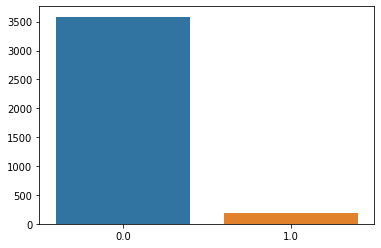

In [57]:
#проверяем насколько сбалансированы данные
print(cred["Залоги"].value_counts())
sns.barplot(cred["Залоги"].value_counts().index, cred["Залоги"].value_counts().values)

# Задача 4

## Описание данных

Набор данных о 3774 российских компаний Калининградской области. Компании отобранны случайным образом из различных отраслей экономики. Данные содержат информацию о финансовых показателях компани за 2019 год.

## Суть задачи

Задача поиска потенциальных клиентов банка для реализации услуг по продаже банковских гарантий.

Суть услуги "Банковская гарантия" - банк проводит проверку своего клиента (ЮЛ либо ИП) и предоставляет за него "поручительство" перед его контрагентом. Существует много видов гарантий, наиболее распространены гарантии исполнения обязательств по договору по которым банк гарантирует что его клиент выполнит свои обязательства по контракту, в случае неисполнения клиентом банка своих обязательств по договору банк оплачивает контрагенту своего клиента сумму указанную в банковской гарантии(происходит раскрытие гарантии).
В случае раскрытия гарантии у клиента банка возникает обязательство по возврату средств в адрес банка(т. е. при раскрытии гарантии для компании банковскаягарантия превращается в кредит).

Как правила по банковским гарантиям предусмотрено 2 вида плат - плата за выдачу гарантии и процент, который клиент уплачивает при раскрытии гарантии.
Для банка банковские гарантии интересны как источник некредитных комиссий.

Компании, которые используют банковские гарантии как правило нуждаются в них постоянно, поэтому признак наличия банковских гарантий говорит о высокой вероятности в потребности в гарантиях в будующем.

Построить модель классификации клиентов по признаку "БГ" (определить компании, которые пользуются гарантиями).

In [58]:
bg.head(3)

,СПАРК код,Дата регистрации,Код статистики,Отрасль,Форма собственности,Налоговый режим,Код причины постановки на учет,"2019, Основные средства , RUB","2019, Долгосрочные финансовые вложения, RUB","2019, Отложенные налоговые активы, RUB",...,"2019, Выручка, RUB","2019, Коммерческие расходы, RUB","2019, Управленческие расходы, RUB","2019, Прибыль (убыток) от продажи, RUB","2019, Проценты к уплате, RUB","2019, Прочие расходы, RUB","2019, Чистая прибыль (убыток), RUB","2019, Получение кредитов и займов, RUB","2019, Погашение векселей, возврат кредитов и займов, RUB",БГ
0,4283790,2003-10-14,71115178.0,Производство,Частная собственность,УСН,390601001.0,651000.0,0.0,0.0,...,909000.0,0.0,47000.0,-320000.0,0.0,47000.0,-365000.0,0.0,0.0,0.0
5,10527024,2016-04-07,1811746.0,Производство,Частная собственность,УСН,390601001.0,36000.0,0.0,0.0,...,366000.0,0.0,0.0,-854000.0,0.0,20000.0,-874000.0,0.0,0.0,0.0
13,11837132,2018-03-05,26713625.0,Производство,Частная собственность,УСН,390601001.0,0.0,0.0,0.0,...,7348000.0,0.0,0.0,1006000.0,0.0,27000.0,922000.0,0.0,0.0,0.0


0.0    3595
1.0     179
Name: БГ, dtype: int64


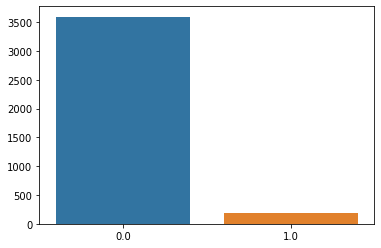

In [59]:
#проверяем насколько сбалансированы данные
print(bg["БГ"].value_counts())
sns.barplot(bg["БГ"].value_counts().index, bg["БГ"].value_counts().values)

# Задача 5

## Описание данных

Набор данных о 3216 российских компаний Калининградской области. Компании отобранны случайным образом из различных отраслей экономики. Данные содержат информацию о финансовых показателях компани за 2019 год и фин показателях за 2018 год.

## Суть задачи

Поиск потенциальных клиентов банка для заключения договоров лизинга.
Построить модель классификации на клиентов использующих лизинг и на компании не пользующиеся лизингом.

In [60]:
lg.head(3)

,СПАРК код,Дата регистрации,Код статистики,Отрасль,Форма собственности,Налоговый режим,Код причины постановки на учет,"2018, Налоги, RUB","2018, Налог на имущество, RUB","2018, Транспортный налог, RUB",...,"2019, Выручка, RUB","2019, Коммерческие расходы, RUB","2019, Управленческие расходы, RUB","2019, Прибыль (убыток) от продажи, RUB","2019, Проценты к уплате, RUB","2019, Прочие расходы, RUB","2019, Чистая прибыль (убыток), RUB","2019, Получение кредитов и займов, RUB","2019, Погашение векселей, возврат кредитов и займов, RUB",Лизинг
0,4283790,2003-10-14,71115178.0,Производство,Частная собственность,УСН,390601001.0,16597.0,0.0,0.0,...,909000.0,0.0,47000.0,-320000.0,0.0,47000.0,-365000.0,0.0,0.0,0.0
5,10527024,2016-04-07,1811746.0,Производство,Частная собственность,УСН,390601001.0,5667.0,0.0,0.0,...,366000.0,0.0,0.0,-854000.0,0.0,20000.0,-874000.0,0.0,0.0,0.0
13,11837132,2018-03-05,26713625.0,Производство,Частная собственность,УСН,390601001.0,131775.0,0.0,0.0,...,7348000.0,0.0,0.0,1006000.0,0.0,27000.0,922000.0,0.0,0.0,0.0


0.0    3035
1.0     181
Name: Лизинг, dtype: int64


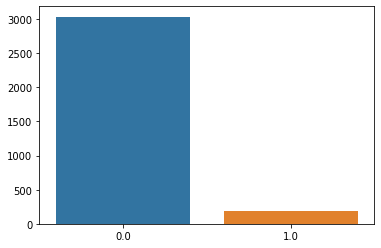

In [61]:
#проверяем насколько сбалансированы данные
print(lg["Лизинг"].value_counts())
sns.barplot(lg["Лизинг"].value_counts().index, lg["Лизинг"].value_counts().values)